In [2]:
import numpy as np
import pandas as pd
from sklearn import feature_extraction,model_selection
import zipfile
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Flatten,Dense,Dropout,Activation
from keras.preprocessing.image import ImageDataGenerator,load_img
from matplotlib import pyplot as plt
import os
import cv2
import random

Using TensorFlow backend.


In [0]:
zip_ref=zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/dogs-vs-cats.zip','r')
zip_ref.extractall()
zip_ref.close()

In [0]:
zip_ref=zipfile.ZipFile('/content/train.zip','r')
zip_ref.extractall()
zip_ref.close()

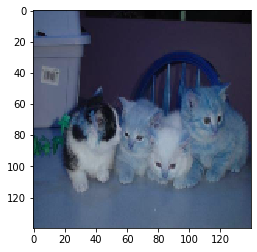

In [5]:
path = os.path.join('/content/train')
for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p))
    new_img_array = cv2.resize(img_array, dsize=(140, 140))
    plt.imshow(new_img_array)
    break

In [0]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p))
        img_array = cv2.resize(img_array, dsize=(112, 112))
        X.append(img_array)
        y.append(category)

In [0]:
create_test_data(path)
X = np.array(X).reshape(-1, 112,112,3)
y = np.array(y)
X=X/255

In [8]:
X.shape,y.shape

((25000, 112, 112, 3), (25000,))

In [9]:
train_X, validate_X ,train_y, validate_y = model_selection.train_test_split(X,y, test_size=0.20)
print(train_X.shape)

(20000, 112, 112, 3)


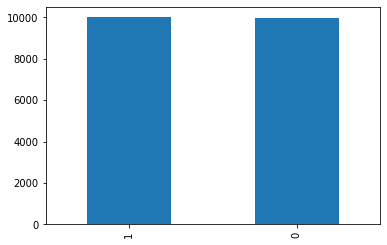

In [10]:
pd.Series(train_y).value_counts().plot.bar()

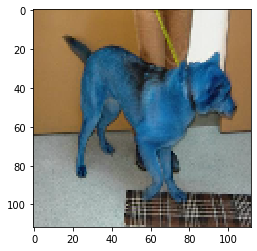

1

In [11]:
i=6
plt.imshow(train_X[i])
plt.show()
train_y[i]

In [0]:
model = Sequential()
model.add(Conv2D(input_shape=(112,112,3),filters=60,kernel_size=(3,3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=(3,3),  activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=(3,3),  activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=192, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=192, kernel_size=(3,3),  activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=25,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation="sigmoid"))

In [23]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 110, 110, 60)      1680      
_________________________________________________________________
dropout_46 (Dropout)         (None, 110, 110, 60)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 108, 108, 64)      34624     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 26, 26, 128)      

In [18]:
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00005)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
hisotry=model.fit(x=train_X,y=train_y,batch_size=256,epochs=300,validation_data=[validate_X,validate_y])

Train on 20000 samples, validate on 5000 samples
Epoch 1/300
20000/20000 [==============================] - 11s 573us/step - loss: 0.7013 - acc: 0.5075 - val_loss: 0.6933 - val_acc: 0.4954
Epoch 2/300
20000/20000 [==============================] - 11s 527us/step - loss: 0.6912 - acc: 0.5268 - val_loss: 0.6894 - val_acc: 0.5510
Epoch 3/300
20000/20000 [==============================] - 11s 527us/step - loss: 0.6691 - acc: 0.5808 - val_loss: 0.6497 - val_acc: 0.6126
Epoch 4/300
20000/20000 [==============================] - 11s 527us/step - loss: 0.6116 - acc: 0.6681 - val_loss: 0.5792 - val_acc: 0.6888
Epoch 5/300
20000/20000 [==============================] - 11s 525us/step - loss: 0.5638 - acc: 0.7070 - val_loss: 0.5596 - val_acc: 0.7314
Epoch 6/300
20000/20000 [==============================] - 10s 524us/step - loss: 0.5257 - acc: 0.7480 - val_loss: 0.4922 - val_acc: 0.7802
Epoch 7/300
20000/20000 [==============================] - 11s 526us/step - loss: 0.5000 - acc: 0.7632 - val_lo

KeyboardInterrupt: ignored

In [0]:
training_loss=history.history['loss']
validation_loss=history.history['val_loss']
epoch_count=range(1,len(training_loss)+1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()